In [51]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from environment import k_BanditGame
from agent import SimpleAgent, OptimisticSimpleAgent, UCBSimpleAgent


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
def experiment_run(env, agent, n_steps = 1000):
    rewards = np.zeros(n_steps, dtype=np.float64)
    actions = np.zeros(n_steps, dtype=np.float64)
    obs, info = env.reset()
    for step in range(0, n_steps):
        action = agent.get_action(obs)
        obs, reward, terminated, truncated, info = env.step(action)
        agent.update(obs, action, reward, terminated, truncated)
        rewards[step] = reward
        actions[step] = (action == env.get_winning_arm())
    return actions, rewards

In [40]:
def experiment(**kwargs):
    print(kwargs)
    n_step = kwargs["n_step"]
    n_runs = kwargs["n_runs"]
    total_rewards = np.zeros(n_step, dtype=np.float64)
    total_optimal_actions = np.zeros(n_step, dtype=np.float64)
    for run in range(n_runs):
        game = k_BanditGame()
        agent = kwargs["agent"](game, **kwargs["agent_params"])
        optimal_actions, reward = experiment_run(game, agent, n_step)
        total_rewards += reward
        total_optimal_actions += optimal_actions
    return total_optimal_actions / n_runs,  total_rewards / n_runs
    

In [43]:
greedy_params = {
    "agent": SimpleAgent,
    "agent_params": {
        "epsilon": 0.0,
        "step_policy": "average",
    },
    "n_runs": 2000,
    "n_step": 1000,
}
greedy_optimal_actions, greedy_rewards = experiment(**greedy_params)

{'agent': <class 'agent.SimpleAgent'>, 'agent_params': {'epsilon': 0.0, 'step_policy': 'average'}, 'n_runs': 2000, 'n_step': 1000}


In [44]:
greedy_params = {
    "agent": SimpleAgent,
    "agent_params": {
        "epsilon": 0.1,
        "step_policy": "average",
    },
    "n_runs": 2000,
    "n_step": 1000,
}
eps_1_optimal_actions, eps_1_reward  = experiment(**greedy_params)

{'agent': <class 'agent.SimpleAgent'>, 'agent_params': {'epsilon': 0.1, 'step_policy': 'average'}, 'n_runs': 2000, 'n_step': 1000}


In [45]:
greedy_params = {
    "agent": SimpleAgent,
    "agent_params": {
        "epsilon": 0.01,
        "step_policy": "average",
    },
    "n_runs": 2000,
    "n_step": 1000,
}
eps_2_optimal_actions, eps_2_reward  = experiment(**greedy_params)

{'agent': <class 'agent.SimpleAgent'>, 'agent_params': {'epsilon': 0.01, 'step_policy': 'average'}, 'n_runs': 2000, 'n_step': 1000}


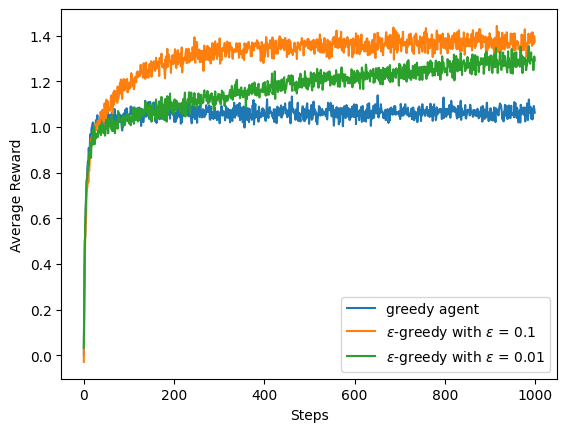

In [46]:
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.plot(greedy_rewards, label="greedy agent")
plt.plot(eps_1_reward, label=r'$\epsilon$-greedy with $\epsilon$ = 0.1')
plt.plot(eps_2_reward, label=r'$\epsilon$-greedy with $\epsilon$ = 0.01')
plt.legend()

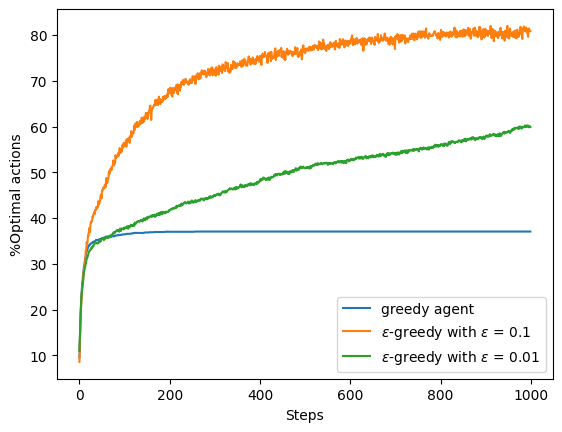

In [47]:
plt.xlabel("Steps")
plt.ylabel("%Optimal actions")
plt.plot(greedy_optimal_actions * 100, label="greedy agent")
plt.plot(eps_1_optimal_actions * 100, label=r'$\epsilon$-greedy with $\epsilon$ = 0.1')
plt.plot(eps_2_optimal_actions * 100, label=r'$\epsilon$-greedy with $\epsilon$ = 0.01')
plt.legend()

In [58]:
greedy_params = {
    "agent": OptimisticSimpleAgent,
    "agent_params": {
        "epsilon": 0.00,
        "optimistic_value": 5.0,
        "step_policy": "constant",
        "step_size": 0.1,
        
    },
    "n_runs": 2000,
    "n_step": 1000,
}
optimistic_greedy_optimal_actions, optimistic_greedy_reward  = experiment(**greedy_params)

{'agent': <class 'agent.OptimisticSimpleAgent'>, 'agent_params': {'epsilon': 0.0, 'optimistic_value': 5.0, 'step_policy': 'constant', 'step_size': 0.1}, 'n_runs': 2000, 'n_step': 1000}


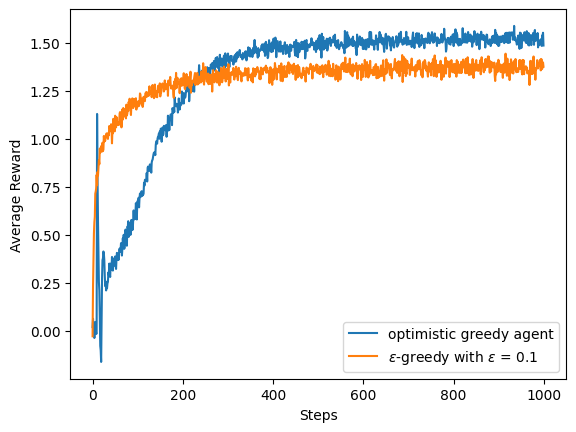

In [49]:
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.plot(optimistic_greedy_reward, label="optimistic greedy agent")
plt.plot(eps_1_reward, label=r'$\epsilon$-greedy with $\epsilon$ = 0.1')
plt.legend()

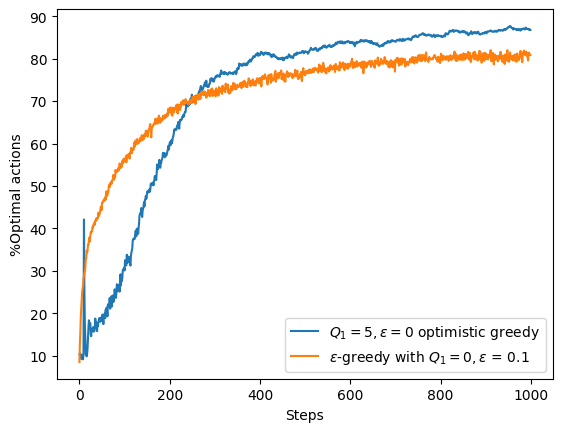

In [50]:
plt.xlabel("Steps")
plt.ylabel("%Optimal actions")
plt.plot(optimistic_greedy_optimal_actions * 100, label=r"$Q_{1} = 5, \epsilon = 0$ optimistic greedy")
plt.plot(eps_1_optimal_actions * 100, label=r'$\epsilon$-greedy with $Q_{1} = 0, \epsilon$ = 0.1')
plt.legend()

In [69]:
greedy_params = {
    "agent": UCBSimpleAgent,
    "agent_params": {
        "step_policy": "average",
        "ucb_c": 2.0,
    },
    "n_runs": 2000,
    "n_step": 1000,
}
ucb_optimal_actions, ucb_reward  = experiment(**greedy_params)

{'agent': <class 'agent.UCBSimpleAgent'>, 'agent_params': {'step_policy': 'average', 'ucb_c': 2.0}, 'n_runs': 2000, 'n_step': 1000}


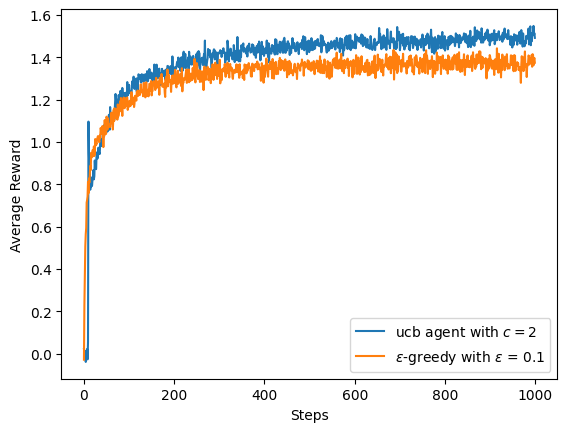

In [70]:
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.plot(ucb_reward, label="ucb agent with $c = 2$")
plt.plot(eps_1_reward, label=r'$\epsilon$-greedy with $\epsilon$ = 0.1')
plt.legend()

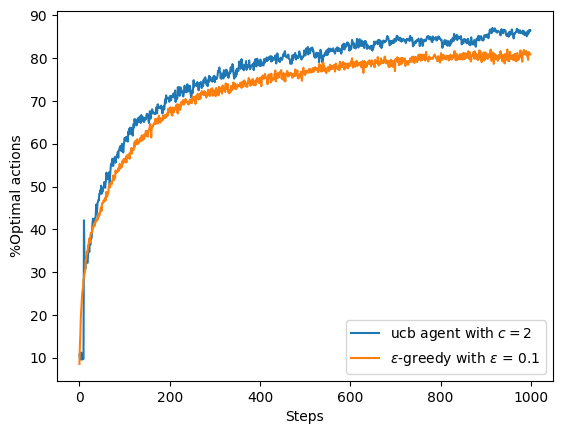

In [73]:
plt.xlabel("Steps")
plt.ylabel("%Optimal actions")
plt.plot(ucb_optimal_actions * 100, label="ucb agent with $c = 2$")
plt.plot(eps_1_optimal_actions * 100, label=r'$\epsilon$-greedy with $\epsilon$ = 0.1')
plt.legend()

In [71]:
greedy_params = {
    "agent": UCBSimpleAgent,
    "agent_params": {
        "step_policy": "average",
        "ucb_c": 1.0,
    },
    "n_runs": 2000,
    "n_step": 1000,
}
ucb_1_optimal_actions, ucb_1_reward  = experiment(**greedy_params)

{'agent': <class 'agent.UCBSimpleAgent'>, 'agent_params': {'step_policy': 'average', 'ucb_c': 1.0}, 'n_runs': 2000, 'n_step': 1000}


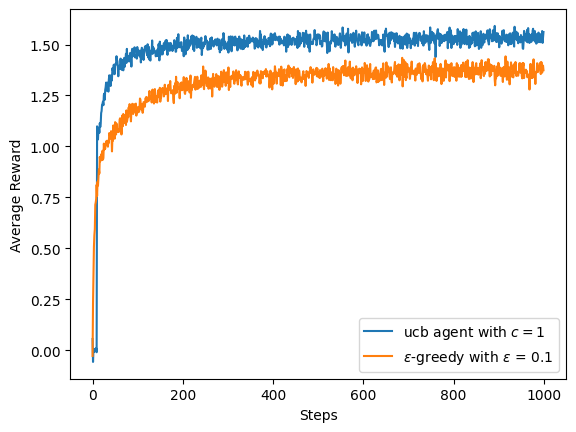

In [72]:
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.plot(ucb_1_reward, label="ucb agent with $c = 1$")
plt.plot(eps_1_reward, label=r'$\epsilon$-greedy with $\epsilon$ = 0.1')
plt.legend()

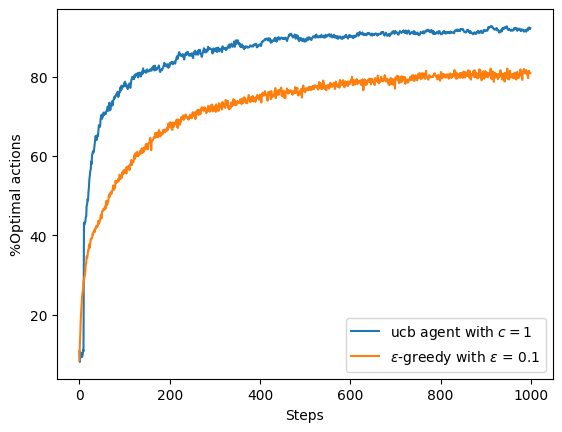

In [74]:
plt.xlabel("Steps")
plt.ylabel("%Optimal actions")
plt.plot(ucb_1_optimal_actions * 100, label="ucb agent with $c = 1$")
plt.plot(eps_1_optimal_actions * 100, label=r'$\epsilon$-greedy with $\epsilon$ = 0.1')
plt.legend()